# Pytorch Test Youtube AutoGrad
Notebook for following along with the Pytorch autograd investigation, using [Pytorch](https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html) website tutorial. This notebook will be similar to the previous Pytorch Test notebooks, as the [youtube content](https://www.youtube.com/watch?v=M0fX15_-xrY) covers similiar works.

### Choices for data

<br>

### Libaries and Modules
Importing the necessary libaries and modules for the notebook.

In [1]:
#Import cell
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import numpy as np
import pandas as pd
import pickle as pk
import torch
import torchvision



print("Imports complete")

Imports complete


<br>

### Importing data sets
Importing the data for the models.

<b>Import sample data set and corresponding time/geo data</b>

In [2]:
#Importing data sets

print("Data sets successfully imported.")

Data sets successfully imported.


<br>

### Class Definitions
<b>Classes:</b><br>
<ul>
<li>
</ul>

In [3]:
#Class definition cell

print("Classes defined.")

Classes defined.


<br>

### Calculation functions
<b>Functions:</b><br>
<ul>
<li>
</ul>

In [4]:
#Calculation functions cell


print("Calculation functions defined.")

Calculation functions defined.


<br>

### Plotting functions
<b>Functions:</b>
<ul>
<li> 
</ul>

In [5]:
#Plotting functions Cell


print("Plotting functions defined.")

Plotting functions defined.


<br>

### Main code

#### A Simple Example

In [6]:
a = torch.linspace(0., 2.*math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


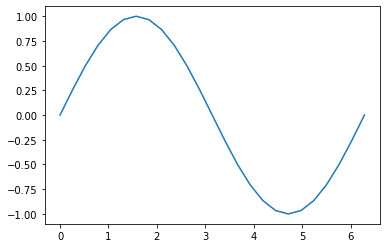

In [7]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [8]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [9]:
c = 2*b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


Autograd expects a single element output. When `.backward()` on a tensor with no arguements is called, it expects the calling tensor to contain only a single element, as is the case when computing a loss function.

In [10]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [11]:
print("d:")
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print(f"\nc:{c.grad_fn}\n")
print(f"b:{b.grad_fn}\n")
print(f"a:{a.grad_fn}")

d:
((<MulBackward0 object at 0x000002147595DBE0>, 0), (None, 0))
((<SinBackward0 object at 0x0000021475978070>, 0), (None, 0))
((<AccumulateGrad object at 0x000002147595D7C0>, 0),)
()

c:<MulBackward0 object at 0x000002147595D7C0>

b:<SinBackward0 object at 0x000002147595D880>

a:None


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


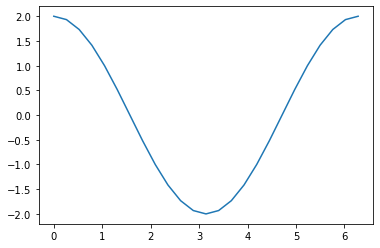

In [12]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

To get here a went through the `sin()` function, as well as `*2` and `+1`. This leaves an expected gradient (shown above) of `2*cos(a)`.

#### Autograd in Training
Resume [video](https://youtu.be/M0fX15_-xrY?t=318) here for autograd in training.

In [13]:
class TinyModel(torch.nn.Module):
    def __init__(self):
        super(TinyModel, self).__init__()
        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)
        return None
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

In [14]:
batch_size = 16
dim_in = 1000
hidden_size = 100
dim_out = 10

some_input = torch.randn(batch_size, dim_in, requires_grad=False)
ideal_output = torch.randn(batch_size, dim_out, requires_grad=False)

model = TinyModel()

In [15]:
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad)

tensor([-0.0912,  0.0061,  0.0784,  0.0466,  0.0416,  0.0916,  0.0774,  0.0754,
        -0.0067, -0.0233], grad_fn=<SliceBackward0>)
None


In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
prediction = model(some_input)
loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(187.1594, grad_fn=<SumBackward0>)


In [17]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0912,  0.0061,  0.0784,  0.0466,  0.0416,  0.0916,  0.0774,  0.0754,
        -0.0067, -0.0233], grad_fn=<SliceBackward0>)
tensor([ 1.8440, -0.0757,  1.4028,  7.9233,  2.8064,  1.0633,  0.5474,  5.5378,
         2.4487,  5.9181])


The gradients for each learning weight has been computed, but not changed, as the optimizer hasn't been run yet.

In [18]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0931,  0.0062,  0.0770,  0.0387,  0.0388,  0.0905,  0.0769,  0.0699,
        -0.0092, -0.0292], grad_fn=<SliceBackward0>)
tensor([ 1.8440, -0.0757,  1.4028,  7.9233,  2.8064,  1.0633,  0.5474,  5.5378,
         2.4487,  5.9181])


One important thing to remember is that whenever `optimizer.step()` is called, it is important to call `optimizer.zero_grad()` afterwards, or the learnign weights will accumulate.

In [19]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()
    
print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad()

print(model.layer2.weight.grad[0][0:10])

tensor([ 1.8440, -0.0757,  1.4028,  7.9233,  2.8064,  1.0633,  0.5474,  5.5378,
         2.4487,  5.9181])
tensor([20.8754, -2.8096,  1.8927, 33.7058,  3.5564, -1.2560,  0.6714, 14.7563,
         5.8344, 27.7620])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


#### Turning Autograd Off and On

In [20]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2*a
print(b1)

a.requires_grad = False
b2 = 2*a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [21]:
a = torch.ones(2, 3, requires_grad=True)*2
b = torch.ones(2, 3, requires_grad=True)*3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b
    
print(c2)

c3 = a*b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


In [22]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y

In [23]:
a = torch.ones(2, 3, requires_grad=True)*2
b = torch.ones(2, 3, requires_grad=True)*3

c1 = add_tensors1(a, b)
c2 = add_tensors2(a, b)

print(c1)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


To enable tracking `torch.enable_grad()` can be used.

In [24]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.3428, 0.4867, 0.9710, 0.9221, 0.8200], requires_grad=True)
tensor([0.3428, 0.4867, 0.9710, 0.9221, 0.8200])


#### Autograd and In-place Operations
In every notebook so far, variables have been used to capture intermediate values of a computation, which is needed by autograd. For this reason, care must be taken when using in-place operations and autograd. The cell below will throw an error on line 2 when inplace `sin_()` is used.

In [25]:
a = torch.linspace(0., 2.*math.pi, steps=25, requires_grad=True)
#torch.sin_(a)

#### Autograd Profiler

In [26]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

In [27]:
x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z/x)*y
        
print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        29.11%       2.935ms        29.11%       2.935ms       5.241us     705.000us        52.53%     705.000us       1.259us           560  
    aten::mul        27.45%       2.768ms        27.45%       2.768ms       4.908us     637.000us        47.47%     637.000us       1.129us           564  
    aten::div        22.17%       2.236ms        22.17%       2.236ms       5.082us       0.000us         0.00%       0.000us       0.000us           440  
    aten::mul        21.27%       2.145ms        21.27%       2

#### Advanced Topic: More Autograd Detail and the High-Level API

In [28]:
x = torch.randn(3, requires_grad=True)
y = x*2
while y.data.norm() < 1000:
    y = y*2

print(y)

tensor([-788.5342, -753.6663, -378.6248], grad_fn=<MulBackward0>)


Trying to call `y.backward()` would produce a runtime error and a message that gradients can only be implicitly computed for scalar outputs. For multi-dimensional outputs, autograd expects us to provide gradients for those three outputs that it can multiply into the Jacobian:

In [29]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) #stand-in for gradients
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


#### The High-Level API
There is an API on autograd that gives you direct access to important differential matrix and vector operations. In particular, it allows you to calculate the Jacobian and Hessian matrices of a particular function for particular inputs.

In [30]:
def exp_adder(x, y):
    return 2*x.exp() + 3*y

inputs = (torch.rand(1), torch.rand(1)) #arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.0045]), tensor([0.6223]))


(tensor([[2.0091]]), tensor([[3.]]))

In [31]:
inputs = (torch.rand(3), torch.rand(3))
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.2346, 0.4595, 0.0911]), tensor([0.4881, 0.2116, 0.6058]))


(tensor([[2.5287, 0.0000, 0.0000],
         [0.0000, 3.1667, 0.0000],
         [0.0000, 0.0000, 2.1908]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

The `torch.autograd.functional.hessian()` method works identically (assuming the function is twice differentiable), but returns a matrix of all second derivatives.

There is also a function to directly compute the vector-Jacobian product:

In [32]:
def do_some_doubling(x):
    y = x*2
    while y.data.norm() < 1000:
        y = y*2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([ -597.1486,  -200.9223, -1424.0468]),
 tensor([1.0240e+02, 1.0240e+03, 1.0240e-01]))

The `torch.autograd.functional.jvp()` method performs the same matrix multiplication as `vjp()` with the operands reversed. the `vhp()` and `hvp()` methods do the same for the vector-Hessian product.

<br>